<a href="https://colab.research.google.com/github/GroupA15/Machine-Learning-from-Disaster/blob/main/machine_learning_110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning From Disaster**

#1. Problem Summary



Back in 1912 a tragic event happened, the Titanic ship hit an iceburg and sank in the morning of 15th April. the aftermath of the event mean't that 1503 people ended up losing their lives. If you research about the incident you would find out that women, children were prioritised as crew members tried to extract them from the ship using lifeboats, Afterwards the more wealthy passengers were the focus. We need to create a model that will predict the survival of the passengers!

## Project Summary


As a group we will create a model using machine learning from what we discover from our research and anaylsis of our results. This model will be used to predict which passengers survived the Titanic shipwreck!

The Data we colect will be used to code in google colab and be stored on github, so each member can freely access the information and participate. Documentation of project will be created on Jira, this will allow use to stay on top of our tasks and present the progress we make each week.

Lastly we will hold weekly team meetings to keep updated on each members work and progress, if needed we will split into groups to tackle the harder/longer tasks to maximise effeciecy within the group.

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import csv

In [161]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

import io
import requests
import re
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

# 2. Data Upload

In [162]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##Train Data

In [163]:
train_data = pd.read_csv('/content/train.csv')
df_train = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [164]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


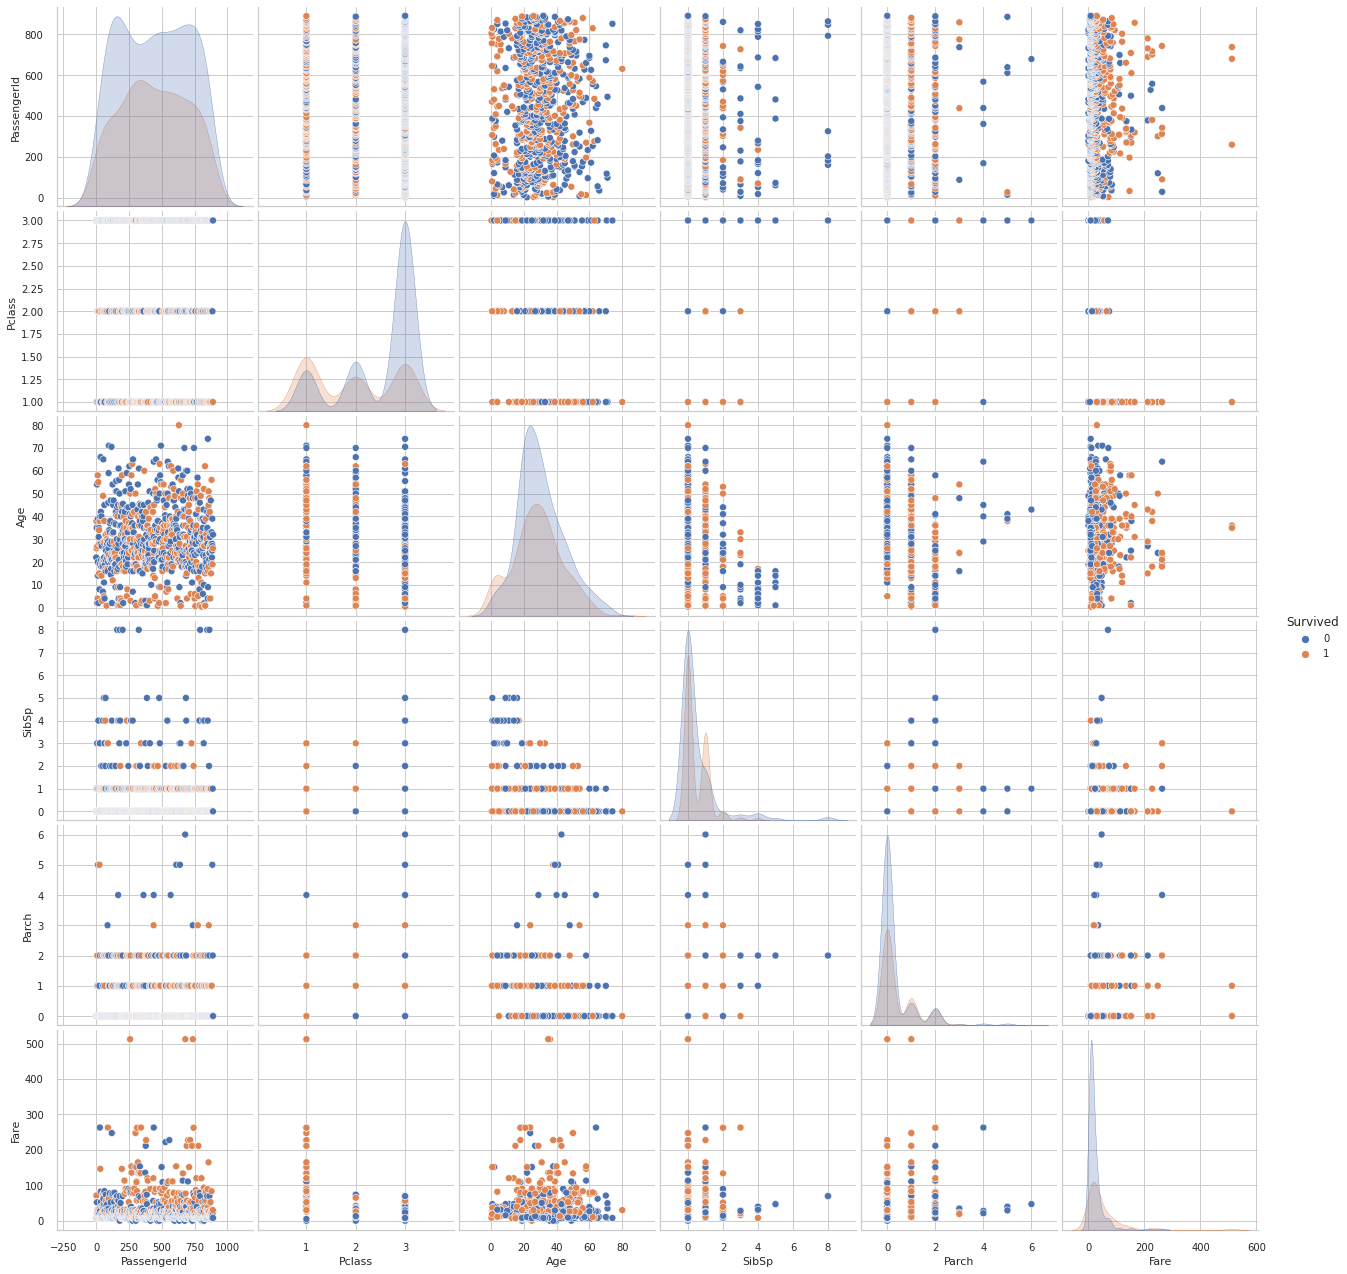

In [165]:
sns.pairplot(train_data, hue="Survived", diag_kind="kde", height=3.0)

#3. Data Exploration


In [166]:
print('Shape of train_data:',train_data.shape)
print(train_data.columns.values) # 891 profiles, 12 Columns

Shape of train_data: (891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [167]:
print('Shape of test_data:',test_data.shape)
print(test_data.columns.values) # 418 Profiles, 11 Columns (No survived column)

Shape of test_data: (418, 11)
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


After looking at the values for train and test, we can clearly see that train contains 891 profiles and 12 columns of values.Whereas train contains only 418 profiles and 11 columns, due to the absence of the survival value. (Useful for predicting and checking with our Machine Learning Model)

## Features Overview

In [168]:
print(train_data.info()) # info on train data for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**Features**

*Categorical*

-- Nominal --
*   Cabin
*   Embarked (C,Q,S)
*   Sex (Male, Female)

-- Ordinal --
*   Pclass (1,2,3)

*Numeric*

-- Discrete --
*   Passender ID
*   SibSp
*   Parch
*   Survived

-- Continous --
*   Age
*   Fare

*Alphanumeric or text features*
*   Name
*   Ticket


















# 4. Data Pre-Processing 

## NULL Data 

In [169]:
print(train_data.isnull().sum()) # sum of missing data for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


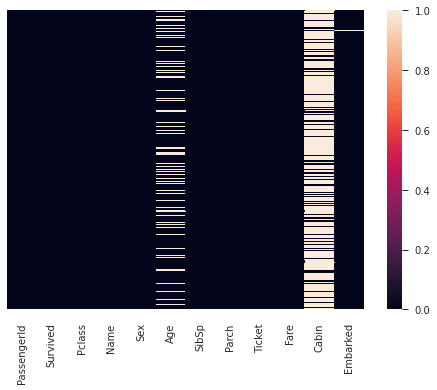

In [170]:
# heatmap showing null values of each column
sns.heatmap(train_data.isnull(),yticklabels=False)

In [171]:
#Defining a function to calculate the percentage of missing values in each column. The input will be dataframe and the output will show as two columns

def missing_percent(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=round(total*100/len(df),2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
    

In [172]:
missing_percent(train_data)
print("Percentage is percentage of all data that is null")

Percentage is percentage of all data that is null


## Ages in Passenger Groups (Train Data)



## Mean average boxplot - Class

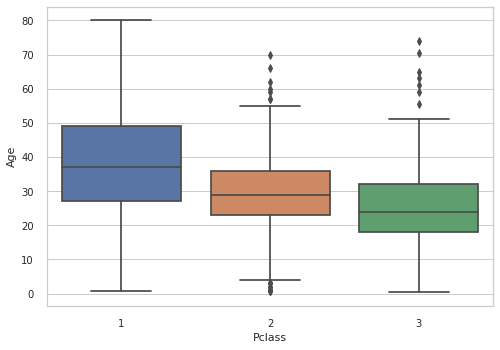

In [173]:
# mean ages in 3 different passenger groups

sns.set_style("whitegrid")
sns.boxplot(x='Pclass',y='Age',data=train_data,)

Boxplot of identifying the mean average of the different Classes.

*   1st - average 37
*   2nd - average 29
*   3rd - average 24



In [174]:
#Defining function to set null ages as mean age in three categories of passengers based on type of ticket was bought

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else: 
            return 24
    else:
        return Age

Above code replaces null values in 'AGE' based on first,second and third class and the their mean averages from the class boxplot

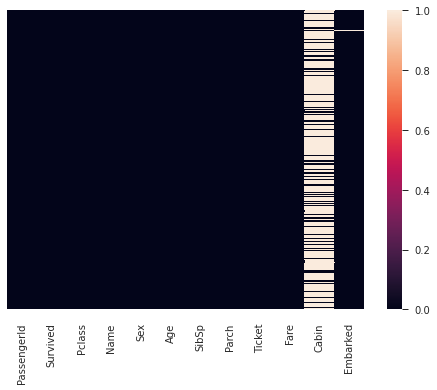

In [175]:
#updated heatmap showing less missing/null data
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train_data.isnull(),yticklabels=False)

## Missing Values/Percentage in Test Data

In [176]:
# Missing values in test data
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [177]:
missing_percent(test_data) # pecentage of missing value data in test data

,Total,Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


All Missing Values:

1.   Cabin (Most)
2.   Age 
3.   Fare (Least)

Cabin has around 77% missing data, Age has around 20% and lastly Fare has around 1% missing.

Due to the large amount of data that is absence from the Cabin value column, It would be in our best interest to remove it from future tests as it would not provide us with any concrete/relevant information.



# 5. Patterns and Relations

## Age based on classes (Test Data)

## New Class BoxPlot

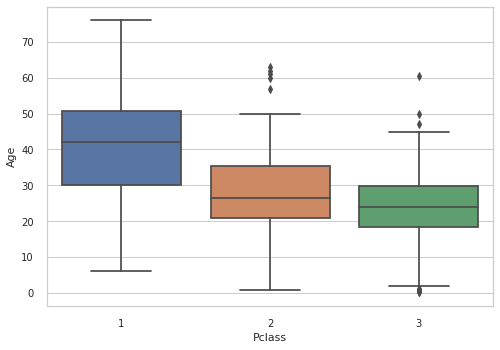

In [178]:
# looking again at the updated data for the mean age based on different classes of tickets

sns.set_style("whitegrid")
sns.boxplot(x='Pclass',y='Age',data=test_data)

The boxplot above displays training data which will help us to identify the mean age for each Class


*   1st = average 42.
*   2nd = average 27.
*   3rd = average 25.



In [179]:
# updating function previously defined to give a more accurate mean age to null ages

def impute_age_test(cols1):
    Age=cols1[0]
    Pclass=cols1[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 27
        else: 
            return 25
    else:
        return Age

##  Null Data on Heat-map 

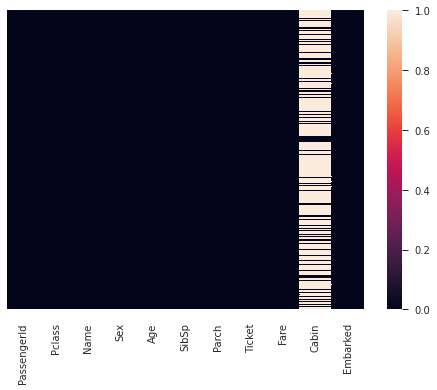

In [180]:
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age_test,axis=1)
sns.heatmap(test_data.isnull(),yticklabels=False) # heat-map that displays the missing data from each column for test data

In [181]:
# removing cabin data from the data set as less than 30% of data is available and is not a helpful data type

train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

## Null Data on Heat-map (removed Cabin Data)

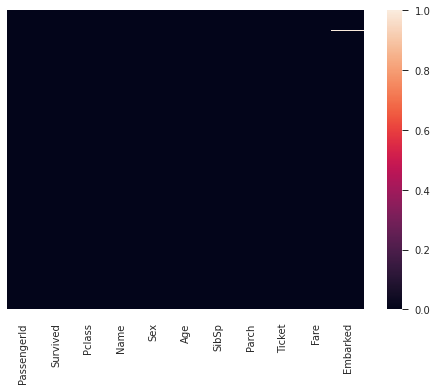

In [ ]:
# showing the new dataset with no null values
sns.heatmap(train_data.isnull(),yticklabels=False)

In [ ]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True) # Removing 'Embarked' missing data from the train data

In [ ]:
print(train_data.isnull().sum()) # overview of Null values after removing Cabin from train data
print('shape of train data: ',train_data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
shape of train data:  (891, 11)


In [ ]:
test_data['Fare'].fillna(test_data['Fare'].mode()[0],inplace=True) # Removing 'Fare' missing data in the test data


In [ ]:
print(test_data.isnull().sum()) # test data total Null values for each column
print('shape of test data: ',test_data.shape)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
shape of test data:  (418, 10)


##Removing Non-Essential Data

### removal of Fare Data

After reviewing the data we have decided to remove the Fare data of each passenger, our analysis shows that survival rates are more affected when you look at the different classes of each passenger. This means that it does not matter how much more you paid for your journey, only that you were of a certain group due to wealthiness.

In [ ]:
# removing Fare data from the data filesas we concluded it was not vital in our research
train_data.drop('Fare',axis=1,inplace=True)
test_data.drop('Fare',axis=1,inplace=True)

In [ ]:
# Test to show if Fare was removed correctly from the data (Train)
print(train_data.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Embarked       891
dtype: int64


In [ ]:
# Test to show if Fare was removed correctly from the data (Test)
print(train_data.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Embarked       891
dtype: int64


###Removal of Name Data

After more reviewing of the data, we have decided to remove name date from the data tables. This is due to it having zero impact on the survival rates and if we need to track peoples identities we can do so through their id numbers.

In [ ]:
# Removing Name data due to its irrelevance to the project
train_data.drop('Name', axis=1,inplace=True)
test_data.drop('Name', axis=1,inplace=True)

In [ ]:
print(train_data.count()) # test to see if the removal was successful (Train)

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Embarked       891
dtype: int64


In [ ]:
print(test_data.count()) # test to see if the removal was successful (Test)

PassengerId    418
Pclass         418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Embarked       418
dtype: int64


## Passengers Survived Bar chart

0 shows the amount of passengers died, 1 shows the amount of passengers that survived


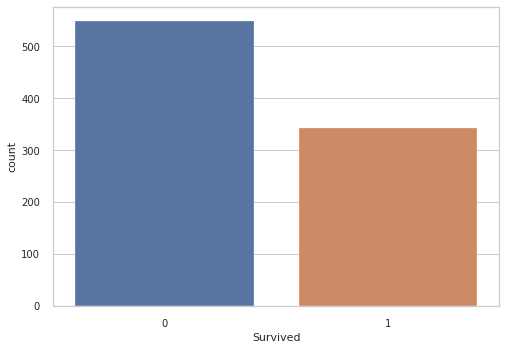

In [182]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data)

#chart that displays the amount of people who survived and the amount who did not

print("0 shows the amount of passengers died, 1 shows the amount of passengers that survived")


As shown above: (Train data)


*   Around 550 people did not survive
*   Around 340 people did survive



## Male/Female Survival Rates Bar chart

Shows which passengers survived based on whether they were female/male


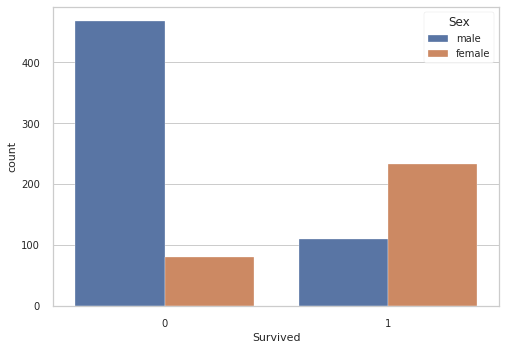

In [183]:
sns.set_style('whitegrid') # chart to display how sex impacted the survival rate
sns.countplot(x='Survived',hue='Sex',data=train_data)
print("Shows which passengers survived based on whether they were female/male")

As shown above: (Train data)

*   reviewing male deaths, 470 did not survive, 110 did survive
*   reviewing female deaths, 85 did not survive, 235 did survive



## Classes Survival rates Bar chart

Shows which passengers survived in different passenger/ticket classes


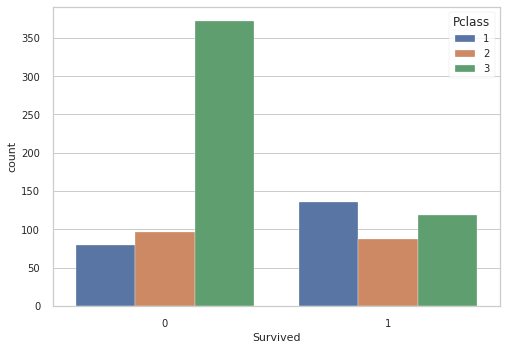

In [184]:
sns.set_style('whitegrid') # chart which displays how classes impact survival rates
sns.countplot(x='Survived',hue='Pclass',data=train_data)
print("Shows which passengers survived in different passenger/ticket classes")

After reviewing the count plot the major information we can gather from this is:

*   3rd Class passengers were the most likely to not survive (370 died)
*   1st Class passengers were most likely to survive (140 survivors)



## Class/sex Survival Pecentages

In [185]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# percentages of classes survival on the ship

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Survival Rates:

*   1st Class - 62.9%
*   2nd Class - 47.3%
*   3rd Class - 24.2%




In [186]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# percentages of sex survival on the ship

,Sex,Survived
0,female,0.742038
1,male,0.188908


Survival Rates:

*   Female - 74.2%
*   Male - 18.8%



## Class Survival Catplot

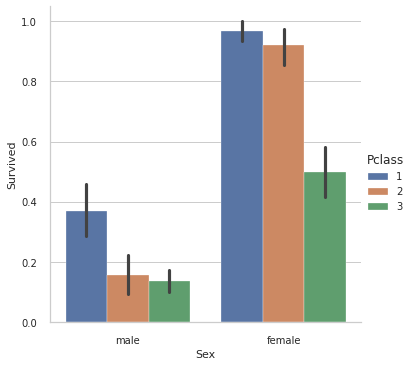

In [187]:
sns.catplot(x='Sex',y='Survived',hue='Pclass', kind='bar',data=train_data)
# comparison chart for sex, survival, class

Summary of above chart: (Classes)

*   1st - Around 38% Male, 95% Female
*   2nd - Around 16% Male, 90% Female
*   3rd - Around 14% Male, 50% Female



## Survival Percentages for people with siblings/Spouse & Parent/child

In [188]:
train_data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# sibling data for survival records

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Summary of survival with siblings/Spouse:

*   1 sibling/Spouse - 53.6% survived
*   5 siblings/spouse - 0% Survived



In [189]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# parent/child data for survival records

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Summary of survival with parent/child:

*   3 parents/children - 60% survived
*   4 parents/children - 0% survived



##Age Graph

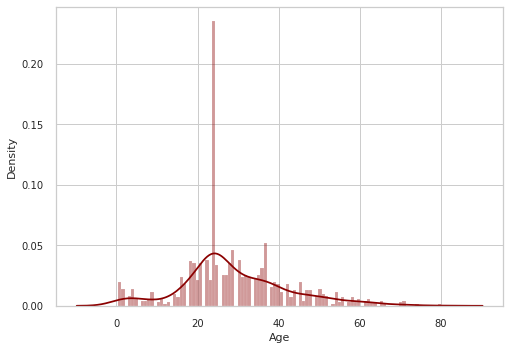

In [190]:
sns.distplot(train_data['Age'],kde=True,bins=100,color='darkred')

The age graph displays all the ages of the passengers from our train data, as you can see the majority of the passengers were between the ages of 18-36!

## Sibling Bar chart

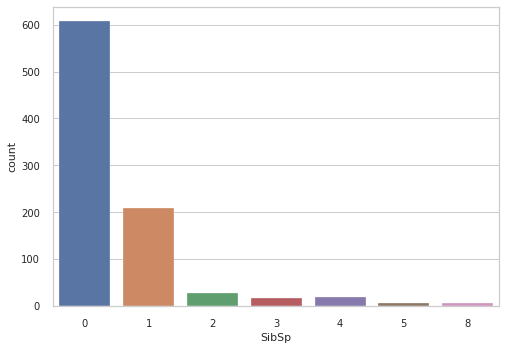

In [191]:
sns.countplot(x='SibSp',data=train_data)
# Sibling calculation data for each passenger

In [192]:
data = [train_data, test_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

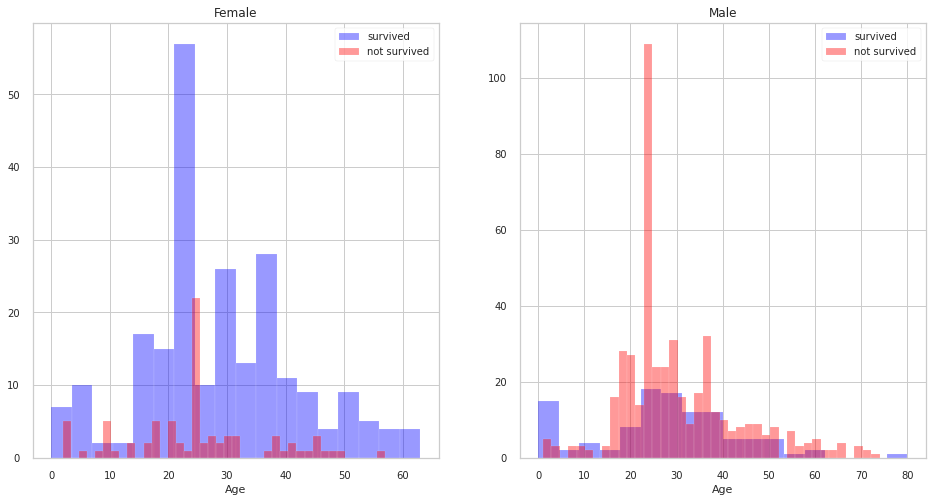

In [193]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="blue")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="blue")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

In [194]:
df = pd.read_csv('train.csv')
fig = px.scatter_3d(df, x='PassengerId', y='Sex', z='Age',
                    color='Age')
fig.show()

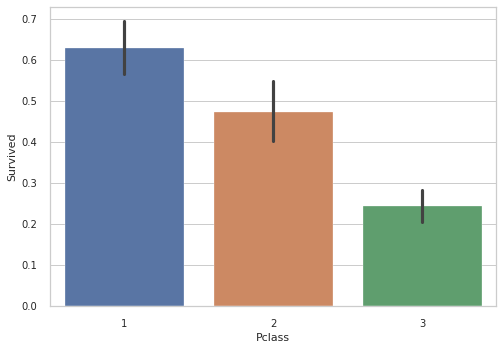

In [195]:
sns.barplot(x='Pclass', y='Survived', data=train_data);

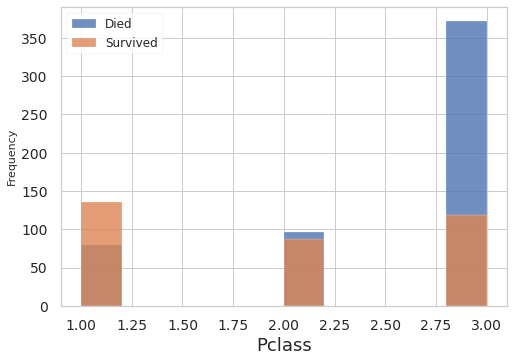

In [196]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = df_train.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

In [197]:
embarked_mode = train_data['Embarked'].mode()
data = [train_data, test_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

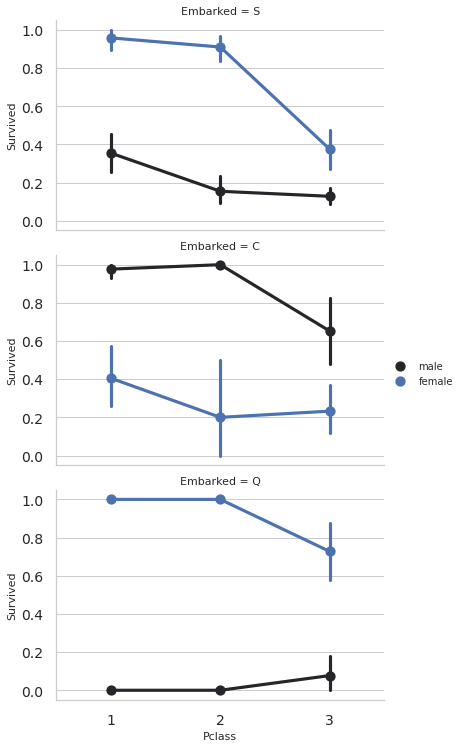

In [198]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=3.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None )
FacetGrid.add_legend();

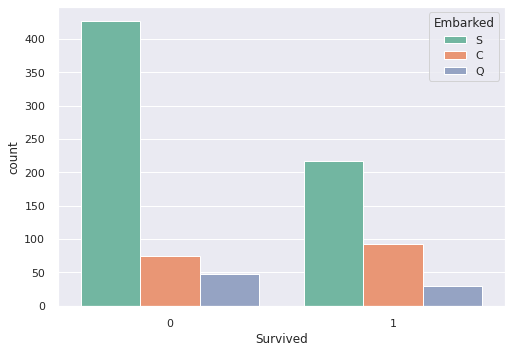

In [199]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=train_data, hue="Embarked", palette="Set2");

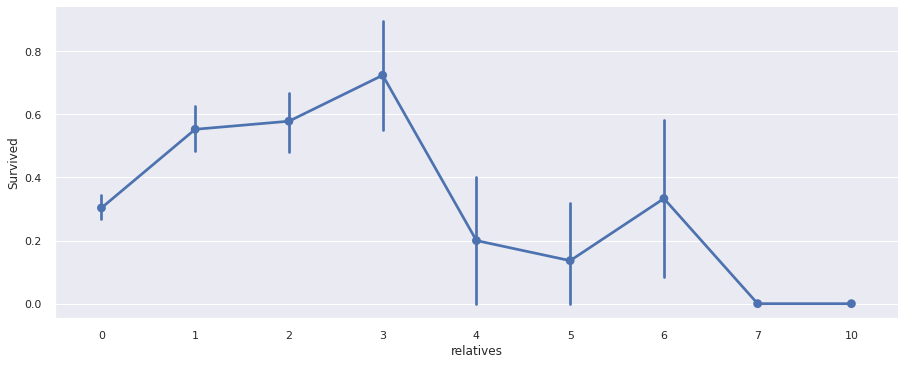

In [200]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'
axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, );

In [201]:
df = pd.read_csv("train.csv")
fig = px.histogram(df, x="SibSp", y="Parch", color="Sex", marginal="rug",
                   hover_data=df.columns)
fig.show()

In [202]:
param_test1 = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

# 6. Statistic Overview

## Summary of results from Train Data

In [203]:
print(train_data.describe())
# summary of collected information on each column - Train data

       PassengerId    Survived      Pclass  ...       Parch        Fare   relatives
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.381594   32.204208    0.904602
std     257.353842    0.486592    0.836071  ...    0.806057   49.693429    1.613459
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    7.910400    0.000000
50%     446.000000    0.000000    3.000000  ...    0.000000   14.454200    0.000000
75%     668.500000    1.000000    3.000000  ...    0.000000   31.000000    1.000000
max     891.000000    1.000000    3.000000  ...    6.000000  512.329200   10.000000

[8 rows x 8 columns]


## Summary of results from Test Data

In [204]:
print(test_data.describe())
# Summary of collected information on each column - Test data

       PassengerId      Pclass         Age  ...       Parch        Fare   relatives
count   418.000000  418.000000  418.000000  ...  418.000000  417.000000  418.000000
mean   1100.500000    2.265550   28.258373  ...    0.392344   35.627188    0.839713
std     120.810458    0.841838   12.884108  ...    0.981429   55.907576    1.519072
min     892.000000    1.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     996.250000    1.000000   22.000000  ...    0.000000    7.895800    0.000000
50%    1100.500000    3.000000   25.000000  ...    0.000000   14.454200    0.000000
75%    1204.750000    3.000000   36.000000  ...    0.000000   31.500000    1.000000
max    1309.000000    3.000000   71.000000  ...    9.000000  512.329200   10.000000

[8 rows x 7 columns]


In [205]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Yes


In [206]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Yes
5,6,0,3,"Moran, Mr. James",male,24,0,0,330877,8.4583,Q,0,Yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S,0,Yes
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S,4,No
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S,2,No
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C,1,No


In [207]:
df = pd.read_csv("gender_submission.csv")

for template in ["plotly_dark"]:
    fig = px.scatter(df,
                     x="PassengerId", y="Survived", color="Survived",
                     log_x=True, size_max=20,
                     template=template, title="Survived or Died?")
    fig.show()

# 7. Engineering Features

In [208]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,892,3,"Kelly, Mr. James",male,22,0,0,330911,7.8292,Q,0,Yes
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38,1,0,363272,7.0000,S,1,No
2,894,2,"Myles, Mr. Thomas Francis",male,26,0,0,240276,9.6875,Q,0,Yes
3,895,3,"Wirz, Mr. Albert",male,35,0,0,315154,8.6625,S,0,Yes
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35,1,1,3101298,12.2875,S,2,No


In [209]:
pd.get_dummies(train_data['Pclass'],drop_first=True).head()
pd.get_dummies(test_data['Pclass'],drop_first=True).head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [210]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Yes


In [211]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,892,3,"Kelly, Mr. James",male,22,0,0,330911,7.8292,Q,0,Yes
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38,1,0,363272,7.0000,S,1,No
2,894,2,"Myles, Mr. Thomas Francis",male,26,0,0,240276,9.6875,Q,0,Yes
3,895,3,"Wirz, Mr. Albert",male,35,0,0,315154,8.6625,S,0,Yes
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35,1,1,3101298,12.2875,S,2,No


In [212]:
# Correlation - the data set with the highest number other than survived, shows the bias
pd.DataFrame(abs(train_data.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.047266
SibSp,0.035322
relatives,0.016639
PassengerId,0.005007


After reviewing the information above it can be shown that Sex is the highest positive coefficient! meaning Sex can have a large affect on survival rates

In [213]:
print(train_data.shape)
print(test_data.shape)

(891, 13)
(418, 12)


In [214]:
X_train=train_data.drop('Survived',axis=1)  
# Removing the dependent feature from the train data
y_train=train_data['Survived']
X_test=test_data  

In [215]:
pd.read_csv('gender_submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 8. Modelling & Predictions 

##Algorithms for Predicting 

In [216]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,No
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,No
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,No
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,0,Yes
887,888,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,0,Yes
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.4500,S,3,No
889,890,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,0,Yes


In [217]:
for data in [X_train,X_test]:
    data["Sex"]=data["Sex"].map({"female":1,"male":0})


In [218]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,1,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1,No
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,1,No
2,3,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,0,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S,1,No
4,5,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,S,0,Yes
887,888,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,S,0,Yes
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24,1,2,W./C. 6607,23.4500,S,3,No
889,890,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C,0,Yes


## Removal of Ticket data

In [ ]:
X_train.drop('Ticket',axis=1,inplace=True)


In [ ]:
X_test.drop('Ticket',axis=1,inplace=True)

In [ ]:
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)

Shape of X_train (891, 11)
Shape of y_train (891,)
Shape of X_test (418, 11)


# Submission

In [219]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,1,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1,No
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,1,No
2,3,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,0,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S,1,No
4,5,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,S,0,Yes
887,888,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,S,0,Yes
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24,1,2,W./C. 6607,23.4500,S,3,No
889,890,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C,0,Yes


In [229]:
y = train_data["Survived"] # using Random Forest !

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_test)

ValueError: ignored

In [231]:
y = train_data["Survived"] # using Random Forest !

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_test)

ValueError: ignored

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=submission)

In [ ]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = survived
submission.to_csv('submission_titanic.csv', index=False)